-0.7071067811865475

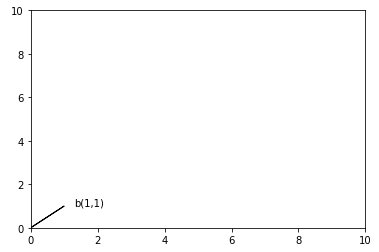

In [29]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([-1,0])
B = np.array([1,1])

ax = plt.axes()

ax.arrow(0 , 0 , A[0] , A[1])
plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.3, A[1]))
ax.arrow(0 , 0 , B[0] , B[1])
plt.annotate(f"b({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.3, B[1]))
plt.xlim(0,10)
plt.ylim(0,10)

cosine_sim = np.dot(A,B) / (np.linalg.norm(A)*np.linalg.norm(B))

cosine_sim

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(A.reshape(1,-1) , B.reshape(1,-1))

array([[0.70710678]])

In [18]:
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

doc_afsan = "afsaan is going to school"

documents = [doc_trump,doc_election , doc_putin,doc_afsan ]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer(stop_words='english')
sparse_mat = count_v.fit_transform(documents)

In [22]:
sparse_mat.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0,
        0, 0, 0, 1, 2, 0, 1, 0],
       [0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 0,
        2, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0]])

In [23]:
count_v.get_feature_names()

['afsaan',
 'career',
 'claimed',
 'earlier',
 'election',
 'elections',
 'friend',
 'friends',
 'going',
 'interference',
 'lost',
 'minister',
 'mr',
 'outcome',
 'parties',
 'political',
 'post',
 'president',
 'prime',
 'putin',
 'republican',
 'russia',
 'says',
 'school',
 'served',
 'support',
 'trump',
 'vladimir',
 'winning',
 'witchhunt']

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame(sparse_mat.toarray() , columns=count_v.get_feature_names() , index = ['doc_trump','doc_election' , 'doc_putin','doc_afsan' ])

In [31]:
cosine_similarity(df,df)

array([[1.        , 0.51639778, 0.36893239, 0.        ],
       [0.51639778, 1.        , 0.45360921, 0.        ],
       [0.36893239, 0.45360921, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])